# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

# 1.Load Data


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
car_data = pd.read_csv('C:\\Users\\lenovo\Desktop\\ASSIGNEMENT\\DLAssignments\\Data\\CarPrice_Assignment.csv')

In [2]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# 2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

In [3]:
# checking empyt celss
np.where(car_data.applymap(lambda x: x ==''))

(array([], dtype=int64), array([], dtype=int64))

In [4]:
car_data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [5]:
# replacing CarName "audi 100 ls" with "audi 100ls"
car_data.iloc[3,2] = 'audi 100ls'

In [6]:
# checking data type of the columns to identify catergorical
car_data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
# removing Car_ID Column as its a manual index of each observation and is not a useful data
car_data.drop(columns=['car_ID'], inplace = True)

In [8]:
# onehot encode all catagorical columns mentioned in data dictionary
final_car = pd.get_dummies(car_data, columns=['CarName','symboling','fueltype',	'aspiration','doornumber', 'carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'], drop_first = True)


In [9]:
final_car.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [10]:
final_car.describe() # checking data distribution and outliers

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,...,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,...,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

In [11]:
print(f"Training + Validation Data 50% + 20%: {len(final_car)*.72}") #validation data will be taken from training data
print(f"Test Data : {len(final_car)*.30}")
print(len(final_car))

Training + Validation Data 50% + 20%: 147.6
Test Data : 61.5
205


In [12]:
#Random.seed with give same seed values always, taking 72% as training data and 28% as testing data
np.random.seed(11111)
distribution = np.random.rand(len(final_car)) < 0.72
train_total = final_car[distribution]
test_total = final_car[~distribution]
len(train_total), len(test_total)

(141, 64)

In [103]:
X_train = final_car.sample(frac = 0.7, random_state = 123)
#X_test = data.drop(X_train.index)
X_train.shape

(144, 193)

In [13]:
train_total.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0


In [14]:
test_total.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
10,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,...,0,0,0,0,0,0,0,1,0,0
14,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121,...,0,0,0,0,0,0,0,1,0,0
15,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182,...,0,0,0,0,0,0,0,1,0,0
18,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.5,48,...,1,0,0,1,0,0,0,0,0,0


In [15]:
#setting train and test labels from train and test data
train_label = train_total.loc[:,'price']
test_label = test_total.loc[:,'price']

In [16]:
# dropping price column from training and test dataset
test_data= test_total.drop(columns = ['price'])
train_data= train_total.drop(columns = ['price'])

In [17]:
print(f"train_data: {train_data.shape}, test_data: {test_data.shape}")

train_data: (141, 192), test_data: (64, 192)


In [18]:
# checking index and column names for data normalization
for i, j in enumerate (train_data):
    print (i, j)

0 wheelbase
1 carlength
2 carwidth
3 carheight
4 curbweight
5 enginesize
6 boreratio
7 stroke
8 compressionratio
9 horsepower
10 peakrpm
11 citympg
12 highwaympg
13 CarName_alfa-romero Quadrifoglio
14 CarName_alfa-romero giulia
15 CarName_alfa-romero stelvio
16 CarName_audi 100ls
17 CarName_audi 4000
18 CarName_audi 5000
19 CarName_audi 5000s (diesel)
20 CarName_audi fox
21 CarName_bmw 320i
22 CarName_bmw x1
23 CarName_bmw x3
24 CarName_bmw x4
25 CarName_bmw x5
26 CarName_bmw z4
27 CarName_buick century
28 CarName_buick century luxus (sw)
29 CarName_buick century special
30 CarName_buick electra 225 custom
31 CarName_buick opel isuzu deluxe
32 CarName_buick regal sport coupe (turbo)
33 CarName_buick skyhawk
34 CarName_buick skylark
35 CarName_chevrolet impala
36 CarName_chevrolet monte carlo
37 CarName_chevrolet vega 2300
38 CarName_dodge challenger se
39 CarName_dodge colt (sw)
40 CarName_dodge colt hardtop
41 CarName_dodge coronet custom
42 CarName_dodge coronet custom (sw)
43 CarNam

### Data Normalization

In [19]:
# normalization is done so that the values are centered around 0 and has a unit standard deviation.
# column 0 to 12 needs to be normalized as these arr numerical columns with discrete values. mean and std of training data is used for both training and test data normalization 
mean = train_data.iloc[:,0:13].mean(axis=0)  
train_data.iloc[:,0:13] -= mean
std = train_data.iloc[:,0:13].std(axis=0)
train_data.iloc[:,0:13] /= std
test_data.iloc[:,0:13] -= mean
test_data.iloc[:,0:13] /= std

In [20]:
# Labels normalization, mean and std of training labels is used for both training and test labels normalization
mean_label = train_label.mean()
train_label -= mean_label
std_label = train_label.std()
train_label /= std_label
test_label -= mean_label
test_label /= std_label

In [21]:
train_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,-1.680447,-0.394328,-0.811424,-1.932948,0.002289,0.103834,0.547925,-1.946131,-0.276679,0.189929,...,0,0,0,0,0,0,0,1,0,0
2,-0.698041,-0.199524,-0.171747,-0.497658,0.521383,0.630989,-2.420623,0.719300,-0.276679,1.309013,...,0,0,0,0,0,0,0,1,0,0
3,0.184459,0.238784,0.148091,0.259856,-0.395997,-0.399360,-0.504219,0.483123,-0.018186,-0.044298,...,0,0,0,0,0,0,0,1,0,0
4,0.117856,0.238784,0.239474,0.259856,0.523271,0.247603,-0.504219,0.483123,-0.535172,0.294030,...,0,0,0,0,0,0,0,1,0,0
5,0.184459,0.295602,0.193783,-0.218574,-0.075103,0.247603,-0.504219,0.483123,-0.405925,0.163903,...,0,0,0,0,0,0,0,1,0,0


In [22]:
test_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.680447,-0.394328,-0.811424,-1.932948,0.002289,0.103834,0.547925,-1.946131,-0.276679,0.189929,...,0,0,0,0,0,0,0,1,0,0
10,0.417573,0.255018,-0.491586,0.259856,-0.286516,-0.423321,0.660654,-1.541255,-0.328378,-0.070323,...,0,0,0,0,0,0,0,1,0,0
14,0.800544,1.245271,0.467930,0.818025,0.959310,0.918528,-0.053300,-0.225409,-0.276679,0.450181,...,0,0,0,0,0,0,0,1,0,0
15,0.800544,1.245271,0.467930,0.818025,1.289642,1.996799,1.111573,0.449383,-0.535172,2.037719,...,0,0,0,0,0,0,0,1,0,0
18,-1.713748,-2.642688,-2.547691,-0.178704,-1.998582,-1.549516,-1.556362,-0.765244,-0.147433,-1.449660,...,1,0,0,1,0,0,0,0,0,0


In [23]:
train_label.head()

1    0.381082
2    0.381082
3    0.069707
4    0.497084
5    0.228447
Name: price, dtype: float64

In [24]:
test_label.head()

0     0.014148
10    0.372534
14    1.365880
15    2.122337
18   -1.004718
Name: price, dtype: float64

### converting the data into numpy array and float32

In [25]:
train_data.dtypes # , test_data.dtype, train_label.dtype, test_label.dtype

wheelbase          float64
carlength          float64
carwidth           float64
carheight          float64
curbweight         float64
                    ...   
fuelsystem_idi       uint8
fuelsystem_mfi       uint8
fuelsystem_mpfi      uint8
fuelsystem_spdi      uint8
fuelsystem_spfi      uint8
Length: 192, dtype: object

In [26]:
test = np.array(test_data.iloc[:]).astype('float32')

In [27]:
train = np.array(train_data.iloc[:]).astype('float32')

In [28]:
test_l= np.array(test_label.astype('float32'))

In [29]:
train_l= np.array(train_label.astype('float32'))

In [30]:
test.shape, train.shape, test_l.shape, train_l.shape

((64, 192), (141, 192), (64,), (141,))

In [31]:
train.dtype

dtype('float32')

# 4. Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
# 5. Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
# 7. If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .


# Models
## Model definition and compilation to evaluate to find out best results

In [67]:
from keras import models, layers

# model is defined in a function to avoid repitition. activation function also given as function input

def build_model(act):
  model = models.Sequential()
  model.add(layers.Dense(128, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dense(64, activation= act))
  model.add(layers.Dense(32, activation= act))
  model.add(layers.Dense(1))
#model compilation
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [33]:
build_model('relu').summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               24704     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_________________________________________________________________


In [34]:
build_model('tanh').summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               24704     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Model with kernel Regulizers l1_l2 added

from keras import regularizers

def build_model_regulized(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(train.shape[1],)))
  model.add(layers.Dense(8, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(6, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(1))
# Model Compilation  
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [36]:
build_model_regulized('tanh').summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                1930      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 2,079
Trainable params: 2,079
Non-trainable params: 0
_________________________________________________________________


In [37]:
build_model_regulized('relu').summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                1930      
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 2,079
Trainable params: 2,079
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Buils Model with dropout layers

def build_model_dropout(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1))
#model compilation
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [39]:
build_model_dropout('relu').summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                1930      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [40]:
build_model_dropout('tanh').summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                1930      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_5 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

# K Fold Validation
## I will use K Fold validation here as number of samples is small. 

In [41]:
# K Fold validation with activation function relu

k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_relu = []

for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)

# Model training
  model = build_model('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0) # verbose 0 is used to hide logs

# evaluation of the model  
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_relu.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [42]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) # to control warnings

In [43]:
all_scores_relu

[0.29806411266326904,
 0.3964998722076416,
 0.3251340985298157,
 0.2679178714752197]

In [44]:
# K fold validation with tanh

k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_tanh = []

for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)

# Training of model wiht tanh activation
  model = build_model('tanh')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)

# evaluation of the model
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) # verbose 0 is used to hide logs
  all_scores_tanh.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [45]:
all_scores_tanh

[0.3497811257839203,
 0.38179710507392883,
 0.4772358536720276,
 0.3103630244731903]

In [47]:
# K fold validtion with regularization with relu


k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_regularization_relu = []

for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)

# Training of model with relu
  model = model = build_model_regulized('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)

# Model Evaluation
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_regularization_relu.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [48]:
all_scores_regularization_relu

[0.3081389367580414,
 0.2417316734790802,
 0.36833104491233826,
 0.4269413650035858]

In [50]:
# K fold validtion with regularization with tanh


k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_regularization_tanh = []

for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)

# Training of model with relu
  model = model = build_model_regulized('tanh')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)

# Model Evaluation
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_regularization_tanh.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [52]:
all_scores_regularization_tanh

[0.30499526858329773,
 0.2895105183124542,
 0.26010560989379883,
 0.4112706184387207]

In [54]:
#k-fold validtion with dropout with relu


k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_dropout_relu = []

for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)

# Training of model with relu
  model = build_model_dropout('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)

# Evaluation of model
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
  all_scores_dropout_relu.append(val_mae)

processing fold # 0
2/2 [==============================] - 0s 0s/step - loss: 0.3980 - mae: 0.4399
processing fold # 1
2/2 [==============================] - 0s 3ms/step - loss: 0.4560 - mae: 0.4137
processing fold # 2
2/2 [==============================] - 0s 0s/step - loss: 0.3382 - mae: 0.3581
processing fold # 3
2/2 [==============================] - 0s 8ms/step - loss: 0.3661 - mae: 0.5634


In [55]:
all_scores_dropout_relu

[0.4399260878562927,
 0.41369307041168213,
 0.3581070899963379,
 0.5633990168571472]

In [56]:
#k-fold validtion with dropout with tanh


k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_dropout_tanh = []

for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)

# Training of model with relu
  model = build_model_dropout('tanh')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)

# Evaluation of the model
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
  all_scores_dropout_tanh.append(val_mae)

processing fold # 0
2/2 [==============================] - 0s 16ms/step - loss: 0.3546 - mae: 0.3943
processing fold # 1
2/2 [==============================] - 0s 0s/step - loss: 0.4337 - mae: 0.3993
processing fold # 2
2/2 [==============================] - 0s 0s/step - loss: 0.6905 - mae: 0.5466
processing fold # 3
2/2 [==============================] - 0s 0s/step - loss: 0.6597 - mae: 0.5797


In [57]:
all_scores_dropout_tanh

[0.39431002736091614,
 0.3992518186569214,
 0.5466459393501282,
 0.5797272324562073]

# Performance comparison

In [66]:
print(f"all_scores_tanh: {all_scores_tanh}\nall_scores_relu: {all_scores_relu}\nall_scores_regularization_relu: {all_scores_regularization_relu}\nall_scores_regularization_tanh: {all_scores_regularization_tanh} \nall_scores_dropout_tanh: {all_scores_dropout_tanh} \nall_scores_dropout_relu: {all_scores_dropout_relu}")

all_scores_tanh: [0.3497811257839203, 0.38179710507392883, 0.4772358536720276, 0.3103630244731903]
all_scores_relu: [0.29806411266326904, 0.3964998722076416, 0.3251340985298157, 0.2679178714752197]
all_scores_regularization_relu: [0.3081389367580414, 0.2417316734790802, 0.36833104491233826, 0.4269413650035858]
all_scores_regularization_tanh: [0.30499526858329773, 0.2895105183124542, 0.26010560989379883, 0.4112706184387207] 
all_scores_dropout_tanh: [0.39431002736091614, 0.3992518186569214, 0.5466459393501282, 0.5797272324562073] 
all_scores_dropout_relu: [0.4399260878562927, 0.41369307041168213, 0.3581070899963379, 0.5633990168571472]


# 6.Train the Model with Epochs (100) and validate it
# 8.Evaluation Step



In [68]:
model_tanh = build_model('tanh')
model_tanh.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_tanh.evaluate(test, test_l)

2/2 [==============================] - 0s 0s/step - loss: 0.1485 - mae: 0.2904


In [69]:
model_relu = build_model('relu')
model_relu.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(test, test_l)

2/2 [==============================] - 0s 0s/step - loss: 0.0821 - mae: 0.2257


In [82]:
model_regulized_relu = build_model_regulized('relu')
model_regulized_relu.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_regulized_relu.evaluate(test, test_l)

2/2 [==============================] - 0s 9ms/step - loss: 0.1114 - mae: 0.2174


In [83]:
model_regulized_tanh = build_model_regulized('tanh')
model_regulized_tanh.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_regulized_tanh.evaluate(test, test_l)

2/2 [==============================] - 0s 16ms/step - loss: 0.1244 - mae: 0.2266


In [84]:
model_dropout_relu = build_model_dropout('relu')
model_dropout_relu.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_dropout_relu.evaluate(test, test_l)

2/2 [==============================] - 0s 16ms/step - loss: 0.1708 - mae: 0.2877


In [85]:
model_dropout_tanh = build_model_dropout('tanh')
model_dropout_tanh.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_dropout_tanh.evaluate(test, test_l)

2/2 [==============================] - 0s 3ms/step - loss: 0.1513 - mae: 0.2771


# 9. Prediction 

### I will use the reverse process of Normalization to retrieve our values of price in thousand of dollars i.e. x = (y - mean)/ std ==>> we will calculate( y = x * std + mean) and then we will compare it with our target values¶

In [86]:
test_l

array([ 0.01414832,  0.3725343 ,  1.3658801 ,  2.122337  , -1.004718  ,
       -0.7045773 , -0.5886972 , -0.97443527, -0.763189  , -0.52312535,
       -0.05301089, -0.3704908 , -0.5449216 , -0.80397296, -0.5536523 ,
       -0.26059392,  0.6062484 ,  1.4864004 ,  2.5404336 ,  3.367835  ,
       -0.8779702 , -0.09159691,  0.18192424, -0.7802841 , -0.50065756,
       -0.9622245 , -0.6813769 , -0.5409531 ,  0.01463675,  0.12453365,
        0.46643507, -0.1806134 ,  0.2687428 ,  0.4299249 ,  0.45129374,
       -0.07511237,  2.3382235 ,  2.200547  , -0.49870384,  0.20280465,
        0.26019526, -0.68430746, -0.7224051 , -0.65524584, -0.98066276,
       -0.7889537 , -0.7547636 , -0.6888255 , -0.6277716 , -0.4983375 ,
       -0.6020069 , -0.4139611 , -0.22347318, -0.54107517,  0.28217462,
       -0.68430746, -0.6574438 , -0.59638995, -0.01027321,  0.056886  ,
       -0.1329914 , -0.05362143,  0.3181964 ,  0.6155285 ], dtype=float32)

In [87]:
def predict(model, m):
  print(f" the Actual value Price was : {test_l[m]* std_label + mean_label} " )
  return(f" the predicted Price was : {(model.predict(test[m:m+1].reshape(1,test.shape[1]))) * std_label + mean_label} ")


In [88]:
x_tanh = predict(model_tanh,2)
x_tanh

 the Actual value Price was : 24565.000309357743 


' the predicted Price was : [[24869.467]] '

In [89]:
x_relu = predict(model_relu,2)
x_relu

 the Actual value Price was : 24565.000309357743 


' the predicted Price was : [[20188.38]] '

In [91]:
x_regulized_relu = predict(model_regulized_relu,2)
x_regulized_relu

 the Actual value Price was : 24565.000309357743 


' the predicted Price was : [[22512.938]] '

In [92]:
x_regulized_tanh = predict(model_regulized_tanh,2)
x_regulized_tanh

 the Actual value Price was : 24565.000309357743 


' the predicted Price was : [[20919.87]] '

In [93]:
x_dropout_relu = predict(model_dropout_relu,2)
x_dropout_relu

 the Actual value Price was : 24565.000309357743 


' the predicted Price was : [[17783.078]] '

In [94]:
x_dropout_tanh = predict(model_dropout_tanh,2)
x_dropout_tanh

 the Actual value Price was : 24565.000309357743 


' the predicted Price was : [[18801.057]] '

In [95]:
# Plots of all models

In [96]:
def plot_fn(mod):
  y_true = test_l* std_label + mean_label
  y_pred = mod.predict(test) * std_label + mean_label
  return y_true , y_pred.flatten()

In [97]:
%matplotlib inline
def plotting(mod, label):
  y_true, y_pred = plot_fn(mod)
  coef = np.polyfit(y_true,y_pred,1)
  poly1d_fn = np.poly1d(coef) 
  # poly1d_fn is now a function which takes in x and returns an estimate for y
  plt.figure()
  plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
  plt.title(label)
  plt.xlabel('Thousand Dollar True' )
  plt.ylabel('Thousand Dollar Predictions' )
  plt.xlim(0, 50000)
  plt.ylim(0, 50000)

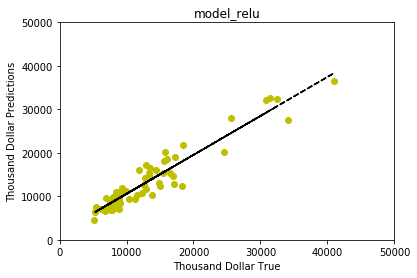

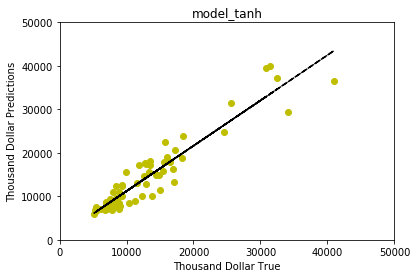

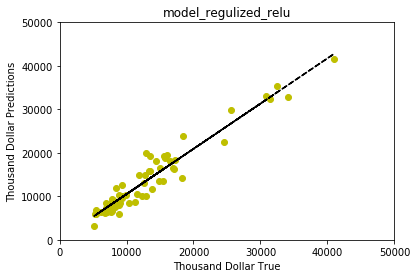

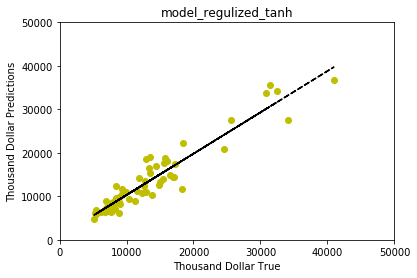

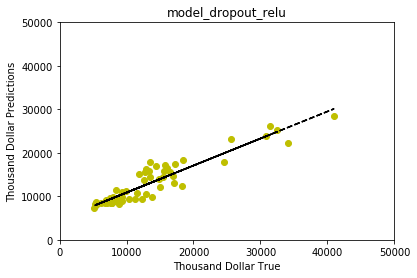

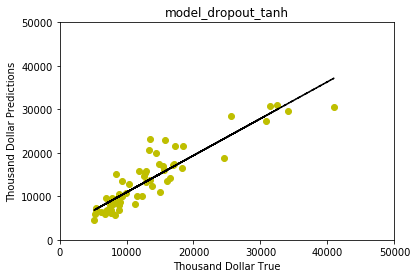

In [100]:
plot_list = []
for i,j in enumerate([model_relu, model_tanh, model_regulized_relu, model_regulized_tanh, model_dropout_relu, model_dropout_tanh]):
  list_name = ['model_relu', 'model_tanh', 'model_regulized_relu','model_regulized_tanh', 'model_dropout_relu', 'model_dropout_tanh']
  plot_list.append(plotting(j,list_name[i]))

In [ ]:
# model relu regularised seems gives best results